## Search Based ##

In [9]:
connections = {
    '北京':['太原','沈阳'],
    '太原':['北京','西安','郑州'],
    '兰州':['西安'],
    '郑州':['太原'],
    '西安':['兰州','长沙'],
    '长沙':['福州','南宁'],
    '沈阳':['北京'],
    '福州':['长沙'],
    '南宁':['长沙']
}

In [11]:
def board_first_search(graph, start):
    """broad first search"""
    visited = [start]
    seen = set()
    while visited:
        frontier = visited.pop()
        if frontier in seen:
            continue
        for successor in connections[frontier]:
            if successor in seen:
                continue
            print(successor)
            visited = [successor] + visited  #每次扩展都先考虑老的点
        seen.add(frontier)
    return seen

In [12]:
def depth_first_search(graph, start):
    """depth first search"""
    visited = [start]
    seen = set()
    while visited:
        frontier = visited.pop()
        if frontier in seen:
            continue
        for successor in connections[frontier]:
            if successor in seen:
                continue
            print(successor)
            visited = visited + [successor]  #每次扩展都扩展最新发现的点
        seen.add(frontier)
    return seen

In [15]:
board_first_search('太原','长沙')

福州
南宁


{'南宁', '福州', '长沙'}

In [16]:
depth_first_search('太原','长沙')

福州
南宁


{'南宁', '福州', '长沙'}

In [1]:
import matplotlib

In [2]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [3]:
import networkx as nx
import re

In [4]:
city_location = {}

In [6]:
for line in coordination_source.split('\n'):
    if line.startswith('//'):
        continue
    if line.strip()== '':
        continue
        
    city = re.findall("name:'(\w+)'",line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]",line)[0]
    x_y = tuple(map(float,x_y))
    city_location[city] = x_y
    print(city,x_y)

兰州 (103.73, 36.03)
嘉峪关 (98.17, 39.47)
西宁 (101.74, 36.56)
成都 (104.06, 30.67)
石家庄 (114.48, 38.03)
拉萨 (102.73, 25.04)
贵阳 (106.71, 26.57)
武汉 (114.31, 30.52)
郑州 (113.65, 34.76)
济南 (117.0, 36.65)
南京 (118.78, 32.04)
合肥 (117.27, 31.86)
杭州 (120.19, 30.26)
南昌 (115.89, 28.68)
福州 (119.3, 26.08)
广州 (113.23, 23.16)
长沙 (113.0, 28.21)
沈阳 (123.38, 41.8)
长春 (125.35, 43.88)
哈尔滨 (126.63, 45.75)
太原 (112.53, 37.87)
西安 (108.95, 34.27)
北京 (116.46, 39.92)
上海 (121.48, 31.22)
重庆 (106.54, 29.59)
天津 (117.2, 39.13)
呼和浩特 (111.65, 40.82)
南宁 (108.33, 22.84)
银川 (106.27, 38.47)
乌鲁木齐 (87.68, 43.77)
香港 (114.17, 22.28)
澳门 (113.54, 22.19)


In [7]:
import math
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  #km
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [8]:
def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])

In [9]:
get_city_distance('杭州','上海')

153.5185697155768

In [10]:
cities = list(city_location.keys())

In [11]:
city_graph = nx.Graph()

In [12]:
city_graph.add_nodes_from(cities)

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

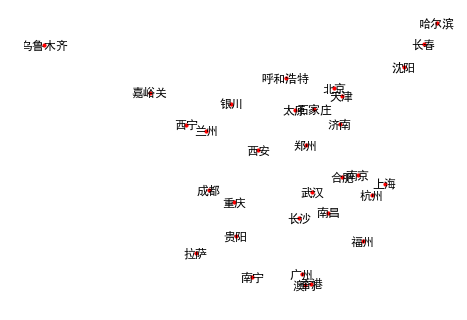

In [17]:
nx.draw(city_graph, city_location, with_labels = True, node_size = 10)

In [22]:
threshold = 700

In [23]:
from collections import defaultdict
cities_connection = defaultdict(list)

In [24]:
for c1 in cities:
    for c2 in cities:
        if c1 == c2:
            continue
            
        if get_city_distance(c1,c2) < threshold:
            cities_connection[c1].append(c2)

In [25]:
cities_connection['兰州']

['嘉峪关', '西宁', '成都', '拉萨', '贵阳', '西安', '重庆', '南宁', '银川']

In [26]:
cities_connection_graph = nx.Graph(cities_connection)

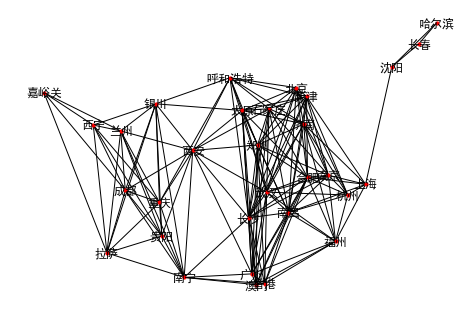

In [27]:
nx.draw(cities_connection_graph, city_location, with_labels = True, node_size = 10)

In [28]:
def is_goal(desitination):
    def _wrap(current_path):
        return current_path[-1] == desitination
    return _wrap

In [30]:
def search(graph, start, is_goal, search_strategy):
    pathes = [[start]]
    seen = set()
    
    while pathes:
        path = pathes.pop(0)
        froniter = path[-1]
        
        if froniter in seen:
            continue
        successors = graph[froniter]
        
        for city in successors:
            if city in path:
                continue
            new_path = path+[city]
            pathes.append(new_path)
            if is_goal(new_path):
                return new_path
        
        seen.add(froniter)
        pathes = search_strategy(pathes)

In [33]:
search(cities_connection, start='西安', is_goal = is_goal('上海'), search_strategy= lambda n: n)

['西安', '石家庄', '济南', '上海']

In [34]:
def sort_path(cmp_func, beam = -1):
    def _sorted(pathes):
        return sorted(pathes, key=cop_func)[:beam]
    return _sorted

In [35]:
search(cities_connection, start='北京', is_goal = is_goal('拉萨'), search_strategy= lambda n: n)

['北京', '长沙', '南宁', '拉萨']

## Machine Learning, the first step ##

In [36]:
from sklearn.datasets import load_boston

In [37]:
dataset = load_boston()

In [38]:
X, y = dataset['data'], dataset['target']

In [39]:
X.shape

(506, 13)

In [40]:
y.shape

(506,)

In [41]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [42]:
X[:,0].shape

(506,)

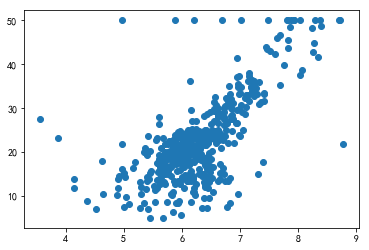

In [43]:
plt.scatter(X[:,5],y)

In [44]:
room_num = X[:,5]
price = y

In [45]:
import random
import numpy as np

loop == 10000
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 17.513913086553558
loop == 9999
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 14.19016690773104
loop == 9998
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 11.285697735267895
loop == 9997
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 8.900852440579447
loop == 9996
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 7.354836114609149
loop == 9995
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 6.379135133230205
loop == 9994
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.930132064250314
loop == 9993
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.841378440687427
loop == 9992
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.827963521172417
loop == 9991
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.826

loop == 9784
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.772596709268563
loop == 9783
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.772345901849753
loop == 9782
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.772092749696471
loop == 9781
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.771836155185222
loop == 9780
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.77158879012438
loop == 9779
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.7713264085206895
loop == 9778
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.771084830552288
loop == 9777
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.770820421609406
loop == 9776
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.770577111226951
loop == 9775
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.770316

loop == 9575
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.721056297231087
loop == 9574
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.720823282139068
loop == 9573
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.72059026704705
loop == 9572
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.720357251955033
loop == 9571
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.720124236863013
loop == 9570
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.719891221770996
loop == 9569
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.719658206678977
loop == 9568
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.719425191586959
loop == 9567
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.719192582582297
loop == 9566
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.7189818

f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.68937832373456
loop == 9437
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.689149748252596
loop == 9436
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.688921172770632
loop == 9435
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.688692597288669
loop == 9434
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6884640218067055
loop == 9433
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.688235446324741
loop == 9432
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.688010009530124
loop == 9431
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.687796703527573
loop == 9430
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.687615229949909
loop == 9429
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6873349685456525
lo

loop == 9226
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6414855498505
loop == 9225
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.64125975236538
loop == 9224
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.64103395488026
loop == 9223
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.640808428702341
loop == 9222
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.640594056612828
loop == 9221
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.640368259127709
loop == 9220
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.64014246164259
loop == 9219
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.639916664157471
loop == 9218
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6396908666723515
loop == 9217
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6394833986

loop == 9081
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.609459624240557
loop == 9080
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.6092243197180975
loop == 9079
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.608969458349637
loop == 9078
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.608688307017539
loop == 9077
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.60862442359221
loop == 9076
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.608312026404657
loop == 9075
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.608124630155163
loop == 9074
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.60779063408672
loop == 9073
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.60756564111659
loop == 9072
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.60736989

f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.578506274716311
loop == 8938
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.578280902390152
loop == 8937
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.578079193831631
loop == 8936
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.577853826530509
loop == 8935
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.577637936044446
loop == 8934
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.577426750670863
loop == 8933
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.577201378344705
loop == 8932
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.576994974723772
loop == 8931
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.576774302485062
loop == 8930
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.576553716936586
loo

loop == 8733
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.534427098583596
loop == 8732
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.534207404989376
loop == 8731
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.534003380629871
loop == 8730
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.533787971355044
loop == 8729
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.533579662676146
loop == 8728
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.533368537720711
loop == 8727
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.53315594472242
loop == 8726
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.532949104086378
loop == 8725
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.532732226768695
loop == 8724
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.5325302

loop == 8589
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.5040846603522535
loop == 8588
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.50386268505546
loop == 8587
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.503660942398528
loop == 8586
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.503443251421127
loop == 8585
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.503237224444802
loop == 8584
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.503023817786794
loop == 8583
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.502813506491077
loop == 8582
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.502604384152463
loop == 8581
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.502389788537352
loop == 8580
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.502184

loop == 8439
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.472468120822657
loop == 8438
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.472291196879116
loop == 8437
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.472076203494625
loop == 8436
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.471847893559693
loop == 8435
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.471637296048373
loop == 8434
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.471455976231661
loop == 8433
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.4712276662967305
loop == 8432
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.4709993563618
loop == 8431
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.470819787824529
loop == 8430
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.4706074

loop == 8222
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.427164926273564
loop == 8221
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.426968488524391
loop == 8220
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.426751227279489
loop == 8219
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.426546899291811
loop == 8218
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.4263401726785725
loop == 8217
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.42612291143367
loop == 8216
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.425928872310058
loop == 8215
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.425711856832755
loop == 8214
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.425504638684318
loop == 8213
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.425300

loop == 8073
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.39669902571606
loop == 8072
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.396418667665412
loop == 8071
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.3962118732892295
loop == 8070
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.396011565793983
loop == 8069
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.395823351403073
loop == 8068
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.395673815886484
loop == 8067
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.395531075041935
loop == 8066
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.395243720010222
loop == 8065
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.3950091763924295
loop == 8064
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.39495

loop == 7921
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.36612311475483
loop == 7920
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.365921429257087
loop == 7919
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.365719743759344
loop == 7918
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.36552390404519
loop == 7917
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.365326402839317
loop == 7916
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.365124717341574
loop == 7915
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.364923031843833
loop == 7914
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.36472134634609
loop == 7913
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.364519660848347
loop == 7912
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.364323886

loop == 7702
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.323234390602861
loop == 7701
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.323042228859592
loop == 7700
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.32285006711632
loop == 7699
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.32265790537305
loop == 7698
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.32246574362978
loop == 7697
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.322273581886509
loop == 7696
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.322081420143238
loop == 7695
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.3218971847236185
loop == 7694
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.32170575760098
loop == 7693
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.321550169

loop == 7543
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.295235190413258
loop == 7542
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.295023290682745
loop == 7541
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294863349737902
loop == 7540
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294742896680132
loop == 7539
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294582050221428
loop == 7538
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294359563601398
loop == 7537
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294189063349479
loop == 7536
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.294018563097562
loop == 7535
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.293848062845644
loop == 7534
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.293677

loop == 7382
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.268171566180372
loop == 7381
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.268007883124822
loop == 7380
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.267837382872905
loop == 7379
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.267666882620988
loop == 7378
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.267496382369071
loop == 7377
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.26733659081558
loop == 7376
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.26716764242625
loop == 7375
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.266997142174333
loop == 7374
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.266826641922413
loop == 7373
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.26665985

loop == 7191
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.236301365312832
loop == 7190
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.236107621410196
loop == 7189
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.235941286375669
loop == 7188
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.235777324775172
loop == 7187
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.235649412769268
loop == 7186
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.235513234808137
loop == 7185
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.235305131975331
loop == 7184
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.2351167296559105
loop == 7183
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.234950394621385
loop == 7182
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.23478

loop == 6957
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.1984151928707405
loop == 6956
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.198298324157641
loop == 6955
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.198085893929868
loop == 6954
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197892431723225
loop == 6953
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197762026141745
loop == 6952
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197583024056093
loop == 6951
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197538642438768
loop == 6950
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197387703054358
loop == 6949
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.197113841352886
loop == 6948
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.19697

loop == 6808
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.175044033421515
loop == 6807
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.174890983874184
loop == 6806
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.174688987982591
loop == 6805
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.17451148745454
loop == 6804
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.17439701817444
loop == 6803
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.174196948570339
loop == 6802
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.174053564775698
loop == 6801
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.173934848398705
loop == 6800
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.173817475670259
loop == 6799
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.17361547

loop == 6660
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.15232960923876
loop == 6659
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.152173685794282
loop == 6658
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.152045356036477
loop == 6657
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.151921286300381
loop == 6656
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.1517757052373705
loop == 6655
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.151575838597714
loop == 6654
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.151506054438264
loop == 6653
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.151265888815461
loop == 6652
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.151112617885473
loop == 6651
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.150987

loop == 6442
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.119750875043669
loop == 6441
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.1196093634157425
loop == 6440
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.119445720252936
loop == 6439
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.119328212530712
loop == 6438
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.119140565462205
loop == 6437
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.119047061645679
loop == 6436
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.118835410671473
loop == 6435
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.118765910760648
loop == 6434
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.118530514452268
loop == 6433
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.11835

loop == 6202
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.085657495352812
loop == 6201
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.085521039867334
loop == 6200
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.08538354491928
loop == 6199
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.085236374486606
loop == 6198
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.085101984919202
loop == 6197
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.084972978110325
loop == 6196
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.084841077590545
loop == 6195
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.084683223975749
loop == 6194
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.084580170261888
loop == 6193
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.0844146

loop == 6033
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.0635394081203575
loop == 6032
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.063429003982957
loop == 6031
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.06331043701854
loop == 6030
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.063331356977916
loop == 6029
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.063080616569071
loop == 6028
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.06304916647796
loop == 6027
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.062777820633828
loop == 6026
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.062650105640233
loop == 6025
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.062522390646638
loop == 6024
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.0623946

loop == 5874
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.043470168730194
loop == 5873
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.043325189825938
loop == 5872
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.043198415353208
loop == 5871
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.043071640880479
loop == 5870
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042953987169788
loop == 5869
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042828459392719
loop == 5868
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042701684919988
loop == 5867
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042574910447258
loop == 5866
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042448135974527
loop == 5865
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.042321

loop == 5693
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.0209339295268585
loop == 5692
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.020815066456615
loop == 5691
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.02068852039239
loop == 5690
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.020561974328165
loop == 5689
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.02043934381235
loop == 5688
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.020323224868713
loop == 5687
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.0201966788044885
loop == 5686
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.020070132740263
loop == 5685
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.019944758097841
loop == 5684
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 5.019831

loop == 5443
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9904800438708605
loop == 5442
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.990387459866164
loop == 5441
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.99028222913387
loop == 5440
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.990099703980273
loop == 5439
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.99008441439688
loop == 5438
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.989813330262436
loop == 5437
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.989751429278381
loop == 5436
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.989675418878959
loop == 5435
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.989553614541391
loop == 5434
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9893876

f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.962763056730349
loop == 5210
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.962780258608301
loop == 5209
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.962534781601979
loop == 5208
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.96245250873395
loop == 5207
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9622958491000215
loop == 5206
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.962182768520933
loop == 5205
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.962063631821982
loop == 5204
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.961955542556616
loop == 5203
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.961831414543944
loop == 5202
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.961728316592299
loo

loop == 5017
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940767095865719
loop == 5016
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.94088922625134
loop == 5015
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940615248447388
loop == 5014
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940589105502696
loop == 5013
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9404634010290565
loop == 5012
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940297268386077
loop == 5011
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940090756672011
loop == 5010
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.940230590657126
loop == 5009
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.93993890925368
loop == 5008
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9399304

loop == 4843
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9217228590879465
loop == 4842
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.921620111708282
loop == 4841
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.921517364328617
loop == 4840
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.921414616948951
loop == 4839
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.921311869569285
loop == 4838
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9212091221896195
loop == 4837
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.921106374809954
loop == 4836
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.92100362743029
loop == 4835
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.920900880050624
loop == 4834
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.92079

loop == 4694
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906511245275657
loop == 4693
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906457449995181
loop == 4692
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906314981055001
loop == 4691
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906247951120022
loop == 4690
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906118716834343
loop == 4689
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.906038452244864
loop == 4688
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.905922452613687
loop == 4687
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.905828953369706
loop == 4686
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.9057261883930305
loop == 4685
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.90561

loop == 4448
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8820712478100345
loop == 4447
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.882001629432807
loop == 4446
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881907896906255
loop == 4445
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881786744537633
loop == 4444
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881704210866012
loop == 4443
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881604509458973
loop == 4442
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881503725959387
loop == 4441
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881419073246692
loop == 4440
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.881321490880727
loop == 4439
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.88122

loop == 4270
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.865601074514736
loop == 4269
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8655199768446735
loop == 4268
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.86541902830639
loop == 4267
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.865339679181063
loop == 4266
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.865236982098044
loop == 4265
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.865159381517453
loop == 4264
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.865054935889699
loop == 4263
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.864979083853844
loop == 4262
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.864874343457571
loop == 4261
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.864797

loop == 4103
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.850477545302046
loop == 4102
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.850392164110915
loop == 4101
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8502954990937
loop == 4100
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.850211866447305
loop == 4099
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8501134528853544
loop == 4098
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.850033737261336
loop == 4097
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.84996405491007
loop == 4096
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.849857565969061
loop == 4095
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.849751077028053
loop == 4094
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.84967552

loop == 3945
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.836224656723876
loop == 3944
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.836129533595257
loop == 3943
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.836044327074919
loop == 3942
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.835949485916024
loop == 3941
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.835863997425966
loop == 3940
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.835769438236792
loop == 3939
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.835683667777009
loop == 3938
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.83558939055756
loop == 3937
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8355033381280546
loop == 3936
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.835409

loop == 3706
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814909278993007
loop == 3705
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.81486379508503
loop == 3704
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814697539047695
loop == 3703
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814605154454431
loop == 3702
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814550790937272
loop == 3701
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.81444175745409
loop == 3700
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8143327239709075
loop == 3699
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814294251348429
loop == 3698
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.814445348095491
loop == 3697
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.8143964

loop == 3500
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.797022664263105
loop == 3499
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.796947584692961
loop == 3498
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.796910155742092
loop == 3497
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.79677007770223
loop == 3496
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7966815208385585
loop == 3495
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7966090866267574
loop == 3494
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7965198586240545
loop == 3493
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7964306306213516
loop == 3492
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7963467396390405
loop == 3491
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.79

loop == 3304
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780873156252878
loop == 3303
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780795565538682
loop == 3302
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780717974824485
loop == 3301
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780640384110288
loop == 3300
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780562793396092
loop == 3299
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780485202681897
loop == 3298
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7804076119677
loop == 3297
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780330021253504
loop == 3296
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.780252430539306
loop == 3295
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.78017483

loop == 3120
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.767177020754345
loop == 3119
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.767080976047741
loop == 3118
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.767014667448263
loop == 3117
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766969072131886
loop == 3116
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766873027425282
loop == 3115
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766795119970956
loop == 3114
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766761123509426
loop == 3113
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766665078802823
loop == 3112
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766580015119867
loop == 3111
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.766512

f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754951165341434
loop == 2946
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754892519571516
loop == 2945
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754813185586843
loop == 2944
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754744935781919
loop == 2943
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754678759175713
loop == 2942
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7545994251910395
loop == 2941
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754538706222404
loop == 2940
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754464998779909
loop == 2939
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.754387569089345
loop == 2938
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.75433057236878
loo

loop == 2708
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.738144288342321
loop == 2707
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.738084230058901
loop == 2706
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.73800986193119
loop == 2705
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737933092925841
loop == 2704
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737875435520061
loop == 2703
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737796101535387
loop == 2702
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737726863366327
loop == 2701
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737661675124257
loop == 2700
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.737582341139584
loop == 2699
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7375206

loop == 2504
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723909446537455
loop == 2503
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723856275744794
loop == 2502
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723800782620661
loop == 2501
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723712883259244
loop == 2500
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723629385206829
loop == 2499
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723568753136137
loop == 2498
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723497552713268
loop == 2497
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723460089219343
loop == 2496
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723372189857925
loop == 2495
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.723284

loop == 2287
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.70901398998877
loop == 2286
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.7089484566847775
loop == 2285
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708873657472249
loop == 2284
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708813982331952
loop == 2283
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708733324955729
loop == 2282
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708679507979126
loop == 2281
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708597466781405
loop == 2280
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708540559284104
loop == 2279
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708462992428579
loop == 2278
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.708400

loop == 2088
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695369023371498
loop == 2087
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695299934193495
loop == 2086
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695234549018672
loop == 2085
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695159601676974
loop == 2084
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695100074665847
loop == 2083
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.695019269160453
loop == 2082
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.694965600313022
loop == 2081
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.694883559115301
loop == 2080
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.694826503488828
loop == 2079
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.694749

f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6858268743587095
loop == 1947
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685759212846028
loop == 1946
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685691958014133
loop == 1945
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685623201033627
loop == 1944
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685557041669557
loop == 1943
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6854871892212255
loop == 1942
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685422125324981
loop == 1941
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685351177408824
loop == 1940
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685287208980403
loop == 1939
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.685215165596422
l

loop == 1706
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669526925947585
loop == 1705
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669448260865721
loop == 1704
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669392306633905
loop == 1703
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669391539415884
loop == 1702
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669334116998854
loop == 1701
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.66918643983821
loop == 1700
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669118782919932
loop == 1699
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.669056218852879
loop == 1698
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.668981859333406
loop == 1697
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6689259

loop == 1534
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.658160032871928
loop == 1533
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.658099163495713
loop == 1532
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.658033192579937
loop == 1531
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.657960547603418
loop == 1530
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.657906352287949
loop == 1529
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.657832760205193
loop == 1528
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.657768683501884
loop == 1527
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.657705919913203
loop == 1526
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.65763232783045
loop == 1525
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6575768

loop == 1340
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645683651489512
loop == 1339
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645618682294165
loop == 1338
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645554375580368
loop == 1337
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645499933472905
loop == 1336
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645434964277558
loop == 1335
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645369995082211
loop == 1334
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645305025886863
loop == 1333
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645256702282303
loop == 1332
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645224828874569
loop == 1331
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.645124

loop == 1148
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.634256416494535
loop == 1147
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.634200158624156
loop == 1146
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.634143900753779
loop == 1145
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.634087642883402
loop == 1144
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6340313850130235
loop == 1143
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.633978022597039
loop == 1142
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.633927324293438
loop == 1141
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.63387106642306
loop == 1140
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.633814808552683
loop == 1139
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.633758

loop == 949
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623575986829211
loop == 948
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623523214484153
loop == 947
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623497447823769
loop == 946
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623438042529427
loop == 945
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623363679799731
loop == 944
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623313356777423
loop == 943
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623282061981934
loop == 942
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623228184822698
loop == 941
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623151372770251
loop == 940
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.623103499070695


loop == 703
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.61071430359691
loop == 702
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.610699685090727
loop == 701
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6107711731675955
loop == 700
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6105615994666325
loop == 699
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6105418953131165
loop == 698
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.610618469037317
loop == 697
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.610408895336354
loop == 696
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.610384105535506
loop == 695
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.610465764907039
loop == 694
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.61025619120607

loop == 513
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.60113865266104
loop == 512
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.601100204667988
loop == 511
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.601042603859309
loop == 510
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600997554585186
loop == 509
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600946555057578
loop == 508
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600894904502386
loop == 507
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.6008505062558465
loop == 506
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600792254419585
loop == 505
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600754457454117
loop == 504
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.600693054672866


f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592720899154558
loop == 328
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592719406632374
loop == 327
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592676142075086
loop == 326
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592594776981193
loop == 325
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592547717903484
loop == 324
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592539729022976
loop == 323
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592502960824012
loop == 322
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592417809696905
loop == 321
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.592374753244105
loop == 320
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.59233018918866
loop == 319
f

loop == 141
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584670964597197
loop == 140
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584626400541752
loop == 139
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584581836486306
loop == 138
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584541700515071
loop == 137
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584503745596744
loop == 136
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584459181541297
loop == 135
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584414617485853
loop == 134
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.584370053430408
loop == 133
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.5843254893749625
loop == 132
f(age) = 5.518762100583858 * age + 9.03609262442209, with error rate: 4.58428550246714


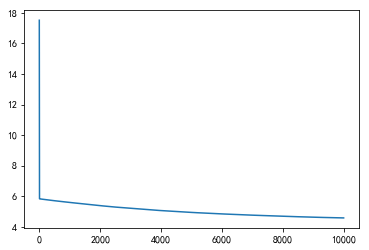

In [47]:
def func(age, k, b):
    return k * age + b

def loss(y, yhat):
    return np.mean(np.abs(y - yhat))

min_error_rate = float('inf')
loop_times = 10000
losses = []
change_directions = [
    (+1,-1),
    (+1,+1),
    (-1,+1),
    (-1,-1)
]
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

best_k, best_b = k_hat, b_hat
best_direction = None

def step():
    return random.random() * 1
direction = random.choice(change_directions)

def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]

    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

learing_rate = 1e-1

while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(price, func(room_num, k_hat, b_hat), room_num)
    b_delta = -1 * learing_rate * derivate_b(price, func(room_num, k_hat, b_hat))

    k_hat += k_delta
    b_hat += b_delta

    estimated_price = func(room_num, k_hat, b_hat)
    error_rate = loss(y=price, yhat=estimated_price)
    print('loop == {}'.format(loop_times))
      
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))

    losses.append(error_rate)

    loop_times -= 1
    
plt.plot(range(len(losses)), losses)
plt.show()

## Beijing ##

In [55]:
import json
import requests
import re
import math
from bs4 import BeautifulSoup
#通过北京地铁百科获取北京地铁的详细信息
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_8; en-us) AppleWebKit/534.50 (KHTML, like Gecko) Version/5.1 Safari/534.50'}
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
response = requests.get(url, headers = headers, allow_redirects=False)
response.encoding="utf-8"
soup = BeautifulSoup(response.content, 'lxml')
table = soup.findAll('table', attrs={'log-set-param':"table_view",'data-sort':"sortDisabled"})
lineDic= {}
for i in table:
    rows = i.findAll('tr')
    for row in rows:
            cols = row.findAll('td')
            if len(cols) > 0:
                href = cols[0].find_all('a',{'href':re.compile("\/item.*"),'data-lemmaid' : ''})
                for item in href:                
                       website = item.get('href') 
                       name = item.text.strip()
                       lineDic[name]= website
                      
#print(lineDic)
#url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF'
url = 'https://baike.baidu.com' + lineDic['北京地铁15号线']
response = requests.get(url, headers = headers, allow_redirects=False)
response.encoding="utf-8"
soup = BeautifulSoup(response.text, 'lxml')
#15号线
table15 = soup.findAll('table', attrs={'class':"fifteen",'log-set-param':"table_view" ,'data-sort':"sortDisabled", 'width':"658"})
#print(len(table15))
stationName = []
for i in table15:
        rows = i.findAll('tr')
        for row in rows:
            cols = row.findAll('th')# 15号线
            if cols != None  and cols != []:
                 #print(cols)
                 s = cols[0].text.strip()
                 p = re.match( r'(.*)——.*', s)
                 #print(p)
                 if p != None or s == '车站名称' or s == '起始/终到车站':
                     continue
                 else:
                     stationName.append(s)
       
#获得了15号线的所有站点  
print('15号线的所有站点') 
print(stationName)
#因为北京地铁百科数据读取比较复杂，后来改为读取北京地铁官网的数据了
url = 'https://www.bjsubway.com/station/xltcx/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_6_8; en-us) AppleWebKit/534.50 (KHTML, like Gecko) Version/5.1 Safari/534.50'}
response = requests.get(url, headers = headers, allow_redirects=False,verify=False)
response.encoding="gb2312"
soup = BeautifulSoup(response.content, 'lxml')
table = soup.findAll('div', attrs={'class':"line_content"})
#print((table))
nameList = []
stationDic= {}

for i in table:
    rows = i.findAll('div',attrs={'class':"line_name"})
    for row in rows:
            cols = row.find('div')
            if cols != None:
               name = cols.text.strip()
               nameList.append(name)
           
#print(nameList)
#print(stationDic)
#获取北京地铁所有线路对应的站点信息
curName = ''
for i in table:
    rows = i.findAll('div')
    for row in rows:
        if row['class']== ['line_name']:
              curName = row.find('div').text.strip()
              stationDic[curName] = []
        else :
            if row['class']== ['station']:
                 station = row.text.strip()
                 stationDic[curName].append(station)
#print(stationDic)  
def writefileContentTOFile(_content):
    with open("station.txt", 'w'
              ,encoding='utf-8') as f:#文件名不能当作参数传
         for a in _content:
             f.write(str(a) + '\n') 
#北京地铁14号线的数据每个站点的顺序不对，所以这块我重新赋值了            
stationDic['14号线'] = [ "善各庄","来广营", "东湖渠", "望京","阜通",  "望京南","将台","东风北桥", "枣营", "朝阳公园","金台路","大望路",   "九龙山", "平乐园" ,"北工大西门", "十里河","方庄", "蒲黄榆", "景泰", "永定门外","北京南站"]            
           
#with open('station.json','w',encoding='utf-8') as f:
 # json.dump(stationDic,f,ensure_ascii=False)
# 从文件读取数据
#读的时候总是报错 还没解决这个问题，如果老师有时间了希望帮我看一下
'''
with open('station2.json','r',encoding='UTF-8') as f:
   stationDic = json.load(f)
   if stationDic.startswith(u'\ufeff'):
     #stationDic = stationDic.encode('utf-8')[3:].decode('utf-8')
'''
connection_info_src = {}           
for k,v in enumerate(stationDic):
    for idx, val in enumerate(stationDic[v]):
         if val not in connection_info_src.keys():
              connection_info_src[val] = []
         if idx > 1:
              connection_info_src[val].append(stationDic[v][idx -1])
         if idx + 1 < len(stationDic[v]):
              connection_info_src[val].append(stationDic[v][idx+1])
#print(connection_info_src)
#2号线 10号线是环路，所以进行了手动处理              
connection_info_src['西直门'].append('车公庄')
connection_info_src['车公庄'].append('西直门')
connection_info_src['巴沟'].append('火器营')
connection_info_src['火器营'].append('巴沟')
#print(connection_info_src)

#如果两个站是同一个地铁线，返回该地铁线
def chechIsSameLine(start,end):
    for k,v in enumerate(stationDic):
       if stationDic[v].count(start) == 1 and stationDic[v].count(end) == 1:
            return v
    return None

def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    visitied = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination:
               return new_path
        visitied.add(froninter)
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制
def transfer_stations_less(pathes): 
    return sorted(pathes, key=len)
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)
def transfer_as_much_possible(pathes):
    return sorted(pathes, key=len, reverse=True)
#按照换乘最少排序
def transfer_station_less_2(pathes):
    if len(pathes) <= 1: return pathes
    
    def get_transfter(path):
        line = []
        for k,v  in enumerate(path[0:-2]):
            #print(v + "+" + path[k+1])
            temp = chechIsSameLine(v, path[k+1])
            if line.count(temp):
                continue
            else:
                line.append(temp)
            
        return len(line)
    return sorted(pathes, key=get_transfter)
def shortest_path_first(pathes):
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station, path[-1])
            
        return distance

    return sorted(pathes, key=get_path_distnace)
def get_geo_distance(origin, destination):
    
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    return d
#按照最少换乘排序
s = search('劲松','霍营',connection_info_src, sort_candidate=transfer_station_less_2)
print('=>'.join(s))

15号线的所有站点
['俸伯', '顺义', '石门', '南法信', '后沙峪', '花梨坎', '国展', '孙河', '马泉营', '崔各庄', '望京东', '望京', '望京西', '关庄', '大屯路东', '安立路', '奥林匹克公园', '北沙滩', '六道口', '清华东路西口']


C:\Users\23139\Anaconda3\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


劲松=>双井=>国贸=>金台夕照=>呼家楼=>团结湖=>农业展览馆=>亮马桥=>三元桥=>太阳宫=>芍药居=>望京西=>北苑=>立水桥=>霍营


## subway route ##

In [27]:
import requests
url = "https://www.mbta.com/schedules/"
lines = ["Red/line", "Mattapan/line", "Orange/line", "Blue/line","Green-B/line", "Green-C/line", "Green-D/line", "Green-E/line"]
ptn = r'{"z_index":null,"tooltip_text":"(\w+[/ ]?\w+)","tooltip":null,"size":null,"rotation_angle":0,"longitude":(-\d+?.\d+?),"latitude":(\d+?.\d+?),"id":"place-.+?","icon_opts":null,"icon":"stop-circle-bordered-expanded"}'

In [28]:
station_coord = dict()   #站点坐标
station_per_line = dict()  #站点
stations = set()    #线路

In [ ]:
for line in lines: # 根据上面预先储存的线路依次爬取
    station_in_order = [] # 预备储存站点顺序
    name = line.split("/")[0] # 得到线路名称，做不做都可以
    station = {s:(float(lon), float(lat)) for s, lon, lat in re.findall(ptn, requests.get(url+line).text)} # 一步到位生成以站点为键，坐标为值的字典
    stations.update(station) # order doesn't matter # 把每条线坐标写进总字典
    station_coord.update(station) # order doesn't matter # 把每条线的站名写进总字典
    # the order of station on each line does matter
    station_in_order.append([s for s in re.findall(r'{"z_index":null,"tooltip_text":"(\w+[/ ]?\w+)"', requests.get(url+line).text)]) # 重新爬取字典，有序放进列表
    station_per_line[name] = station_in_order[0] # 将每条线的站点放进总字典

In [1]:
import re
import requests

url = "http://bj.bendibao.com/ditie/"
lines = re.findall('<a style="color:#.+?;" href="/ditie/(.+?)" target="_blank">', requests.get(url+"linemap.shtml").text)

In [2]:
station_per_line = dict()  #站点
stations = set()   #线路

In [5]:
station_with_change = r'<a class="link" href="/ditie/zd_.+?\.shtml">(.+?)$'
station_without_change = '<a href="/ditie/zd_.+?\.shtml" class="link" target="_blank">(.+?)$'
for line in lines:
    station_in_order = []
    # the order of station on each line does matter
    order = []
    for text in requests.get(url+line).text.split("</a>"):
        if re.search(station_with_change, text):
            stations.update(re.findall(station_with_change, text))# order doesn't matter
            order.append(re.findall(station_with_change, text)[0])
        elif re.search(station_without_change, text):
            stations.update(re.findall(station_without_change, text))# order doesn't matter
            order.append(re.findall(station_without_change, text)[0])
        else: continue
    # I have to write a loop because stations with change lanes have different patterns
    station_per_line[line] = order
    
station_per_line['map_211.shtml'].append(station_per_line['map_211.shtml'][0])
station_per_line['map_212.shtml'].append(station_per_line['map_212.shtml'][0])

In [9]:
import os
import requests
import re
from collections import defaultdict
from enum import Enum
import networkx as nx
import matplotlib.pyplot as plt
from functools import cmp_to_key

In [10]:
SPLIT = ''
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def initSubwayData(url,filename=None):
    """
    将北京地铁线路写到文本文件中
    :param url:爬取的URL地址
    :param filename:文件存储地址，默认为上一级目录齐平的data目录下
    :return:
    """
    if filename == None:
        filename = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))+os.sep+'data'+os.sep+'subway.txt'
    response = requests.get(url,verify=False)
    what_we_want =r'<div\s+class="content">.+?<div\s+class="other"\s+style="display:none;"' #r'<div\s+class="content">(<div/s+class="line_name">.+[<div/s+class="line_name">|<div\s+class="other"\s+style="display:none;">])' #<div\s+class="content">(.+)<div\s+class="other"\s+style="display:none;"
    data = response.text.encode("latin1").decode("gbk")
    pattern = re.compile(what_we_want, re.DOTALL)
    data = re.sub("<a\s+href=\".+?\">|</a>", " ", data)
    likes = pattern.findall(data)
    if likes :
        f = open(filename, 'w')
        what_we_want_2 = r'(<div\s+class="subway_num.+?>(.+?)</div>)|(station">(.+?)</div>)'
        for content in likes[0].split('class="line_name"'):
            #print(content)
            pattern2 = re.compile(what_we_want_2, re.DOTALL)
            l2 = pattern2.findall(content)
            index = 0
            tmpList = []
            for value in l2:
                if index == 0:
                    tmpList.append(value[1])#print(value[1])
                else:
                    tmpList.append(SPLIT)
                    tmpList.append(value[3])
                    #print(index,' : ',value[3])
                index += 1
            f.writelines(tmpList)
            f.writelines(['\n'])
            #print('------------------------------')

        f.close()

def pretty_print(cities):
        return  '->>>>>>'.join(cities)


def drawMap(connetion_info):
    nx.draw(  nx.Graph(connetion_info),with_labels = True,node_size=10)
    plt.show()
    
class BeijingSubway(object):
    #SPP :Shortest Path Priority（路程最短优先约等于最少站点）, MTP,Minimum Transfer Priority(最少换乘优先),Comprehensive Priority(综合优先)
    SORT = Enum('Sort', ('SSP', 'MTP','CP'))

    def __init__(self, filename=None):
        """
        从北京地铁图的数据源文件读取站点信息，构建
        :param filename: 构建北京地铁图的数据源文件地址
        """
        #站点信息
        self.connection_graph =  defaultdict(list)
        #线路名
        self.subways = defaultdict(list)
        #站点其他相关属性：如属于哪些线路
        self.station = defaultdict(set)
        if filename == None:
            filename = os.path.dirname(os.path.dirname(os.path.abspath(__file__))) + os.sep + 'data' + os.sep + 'subway.txt'
        with open(filename, 'r') as f1:
            line = f1.readline()
            while line:
                index = 0
                key = None
                for value in line.split(SPLIT):
                    value = value.replace('\n','')
                    if len(value.strip()) == 0:continue
                    if index == 0:
                        key = value
                        self.subways[key] = []

                    else:
                        self.subways[key].append(value)
                        self.station[value].add(key)
                    index += 1

                line = f1.readline()
            f1.close()

        for key in self.subways:
            listTmp = self.subways[key]
            for i in range(1,len(listTmp)):
                preCity = listTmp[i - 1]
                value = listTmp[i]
                self.connection_graph[value].append(preCity)
                self.connection_graph[preCity].append(value)
        drawMap(self.connection_graph)
        '''
        for key in self.connection_graph:
            print(str(key) + ':' + str(self.connection_graph[key]))
            print('------------------------------')
        '''



    def search(self, start, desitionation, by_way=None, sort=None):
        """
        搜索从起始站start，到目的地站点destination的路径
        :param start:开始站点
        :param destination:终点
        :param by_way:途径站点
        :param sort:排序方式
        :return:
        """
        pathes = [[start]]
        visited = set()
        while pathes:

            path = pathes.pop(0)  # 转战最少
            # print('path=',path)
            froninter = path[-1]
            # print('froninter=',froninter)
            if froninter == '崇文门' or froninter == '北京站' or froninter == '永安里'  or froninter == '建国门':
                g = 0
            if  froninter in visited:
                if not by_way:continue
           # print('froninter=',froninter)
            if froninter in self.connection_graph:
                succesors = self.connection_graph[froninter]
                for city in succesors:
                    if city in path: continue
                    new_path = path + [city]
                    # print('new_path=',new_path)
                    pathes.append(new_path)
                    # print(pathes)
                    if city == desitionation:
                        if not by_way:
                            return pretty_print(new_path)
                        else:
                            #是否有经过这几个站点
                            if set(by_way) <= set(new_path):
                                return pretty_print(new_path)
            visited.add(froninter)
            if sort:
                if sort == BeijingSubway.SORT.SSP:  # 最少站点优先
                    pathes = self.transfer_station_first(pathes)
                elif sort == BeijingSubway.SORT.MTP:  # 最少换乘优先
                    pathes = self.minimum_transfer_first(pathes)
                else: #综合排序
                    pathes = self.comprehensive_first(pathes)
            else:
                pathes = self.comprehensive_first(pathes)

        return pretty_print(pathes)



    def transfer_station_first(self,paths):#最少站点优先
        return sorted(paths,key=len)

    def get_path_linenum(self,path):
            prePreLine = {}  # 上上一站的所属线路
            preLine = {}#上一站的所属线路
            currentLine = {}  # 当前站的所属线路
            index = 0
            lineNum = 0 #线路数
            for station in path:
                if index == 0:
                    currentLine = self.station[station]
                    preLine =  currentLine
                    prePreLine = preLine
                else:
                    currentLine = self.station[station]
                    if len(currentLine&preLine&prePreLine) == 0:#当前站站点和前面站，前前面站点的无交集，代表来到了一个新站
                        lineNum += 1
                    prePreLine = preLine
                    preLine = currentLine
                index += 1
            #print(path,' : ',lineNum)
            return lineNum

    def minimum_transfer_first(self,pathes):  # 最少换乘
        if len(pathes) < 1: return pathes



        return sorted(pathes, key=self.get_path_linenum)



    def comprehensive_first(self,pathes):#Comprehensive Priority(综合优先) 先按照站点数小的，再按换乘少的
            def mycmp(path_a, path_b):
                if len(path_a) > len(path_b):
                    return 1
                elif len(path_a) > len(path_b):
                    return -1
                else:#

                    linenum_a = self.get_path_linenum(path_a)
                    linenum_b = self.get_path_linenum(path_b)
                    if linenum_a > linenum_b:
                        return 1
                    elif linenum_a < linenum_b:
                        return -1
                    else:
                        return 0

            pathes.sort(key=cmp_to_key(mycmp))
            return pathes






if __name__ == '__main__':
    #爬取站点信息   14号线 官网几个站点顺序不对，人工调整，可能其他线路也有站点顺序不对的情况,但做法都是一样
    #14号线 张郭庄 园博园 大瓦窑 郭庄子 大井 七里庄 西局  北京南站 陶然桥 永定门外 景泰 蒲黄榆 方庄   十里河 北工大西门 平乐园 九龙山 大望路 朝阳公园 枣营 东风北桥 高家园 阜通 望京 金台路 将台 望京南 东湖渠 来广营 善各庄
    #initSubwayData(url='https://www.bjsubway.com/station/xltcx/')
    subway = BeijingSubway()
    #最少站点
    print(subway.search('磁器口','大望路',sort=BeijingSubway.SORT.SSP))
    #最少换乘
    print(subway.search('磁器口', '大望路',sort= BeijingSubway.SORT.MTP))
    #综合排序：最少站点-》最少换乘
    print(subway.search('磁器口', '大望路'))
    #输出经过站点的线路
    print(subway.search('磁器口', '大望路',by_way=['崇文门','东四']))
        